In [1]:
#importing all the necessary libs
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

/home/rhythm/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
os.chdir('/home/rhythm/Research/PhD/ResearchProgress/22-Fall/Oct/flesClusterOct22')

In [3]:
columns = ["KE", "E1","E2","t1","t2","costh"]

In [4]:
type = {"KE": np.uint32, "E1" : np.float32,"E2" : np.float32,"t1": np.float32,"t2": np.float32,"costh": np.float32}

In [5]:
type0 = pd.read_csv('./type0.txt', sep = " ", dtype = type,header = None, names = columns)
type1 = pd.read_csv('./type1.txt', sep = " ", dtype = type,header = None, names = columns)

In [9]:
type01 = type0[type0['E2'] == 0]

In [11]:
type01.head()

,KE,E1,E2,t1,t2,costh
1,388,384.295990,0.0,7.525870e-09,-5.000000e-09,0.824813
2,388,384.101013,0.0,9.320120e-09,-5.000000e-09,0.901256
3,364,355.697998,0.0,2.248590e-08,-5.000000e-09,0.409188
4,364,352.859009,0.0,5.432750e-08,-5.000000e-09,0.159599
6,364,359.467987,0.0,2.498990e-08,-5.000000e-09,0.195293


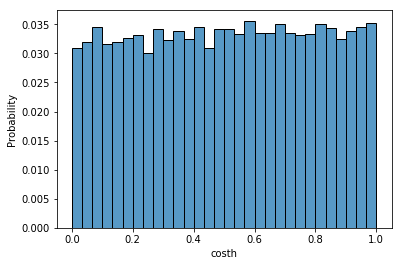

In [10]:
sns.histplot(type01['costh'],stat = 'probability' )

for the  type 0 events emitted in the direction of detector 1 wihh have the highest probability when angle is small or cos higher.


In [14]:
type11 = type1[type1['t1']<type1['t2']]

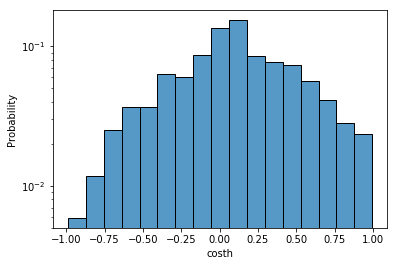

In [17]:
sns.histplot(type11['costh'], stat = 'probability', log_scale=(False, True))

for type 1 events hitting detector 1 first. cos th - 0 corresponds to event emitted at 90 degree  theses events would definitely lead to maximium backscattering compared to the evennts which are emitted in the direction of the detecor with  angle. Those events wont get backscttered. 

In [18]:
det1Hit = pd.concat([type01, type11], ignore_index= True)

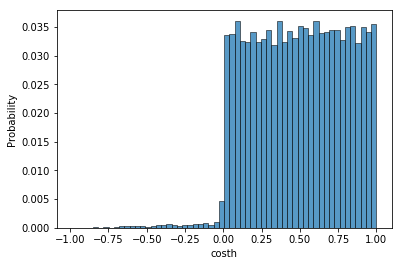

In [19]:
sns.histplot(det1Hit['costh'], stat = 'probability')

less than 0 values corresponds to the multiscatter events. which were emitted in the opposite direction got scattered within the decaytrap hit detector 1 first yet and then detector 2

In [12]:
(type01['costh'] < 0) .sum()

0

In [2]:
os.chdir('/home/rhythm/Research/PhD/ResearchProgress/22-Fall/Sept/26')

In [3]:
columns = ["Evt_id", "KE", "E1","E2","costh","t1","t2"]


In [4]:
type = {"Evt_id" : np.uint32, "KE": np.uint32, "E1" : np.float32,"E2" : np.float32,"costh": np.float32,"t1": np.float32,"t2": np.float32}

In [5]:
foil001 = pd.read_csv('./Type0-0Foil-1.txt', sep = " ", dtype = type,header = None, names = columns)
foil002 = pd.read_csv('./Type0-0Foil-2.txt', sep = " ", dtype = type,header = None, names = columns)
foil003 = pd.read_csv('./Type0-0Foil-3.txt', sep = " ", dtype = type,header = None, names = columns)
foil004 = pd.read_csv('./Type0-0Foil-4.txt', sep = " ", dtype = type,header = None, names = columns)


In [6]:
foil011 = pd.read_csv('./Type1-0Foil-1.txt', sep = " ", dtype= type, header = None, names = columns)
foil012 = pd.read_csv('./Type1-0Foil-2.txt', sep = " ", dtype= type, header = None, names = columns)
foil013 = pd.read_csv('./Type1-0Foil-3.txt', sep = " ", dtype= type, header = None, names = columns)
foil014 = pd.read_csv('./Type1-0Foil-4.txt', sep = " ", dtype= type, header = None, names = columns)


In [7]:
frame0Type0 = [foil001, foil002, foil003, foil004]


In [8]:
foil0Type0 = pd.concat(frame0Type0, ignore_index= True)

converting costh to degree

In [9]:
foil0Type0['angle'] = np.arccos(foil0Type0['costh'])

In [11]:
foil0Type0['angle_deg'] = foil0Type0['angle']*180/(np.math.pi)

In [10]:
np.arccos(-1)*(180/np.math.pi)

180.0

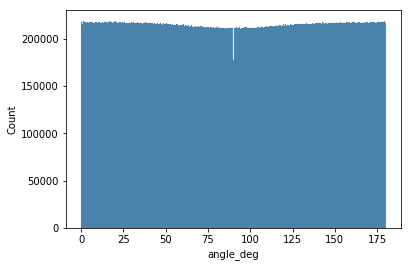

In [12]:
sns.histplot(foil0Type0['angle_deg'])

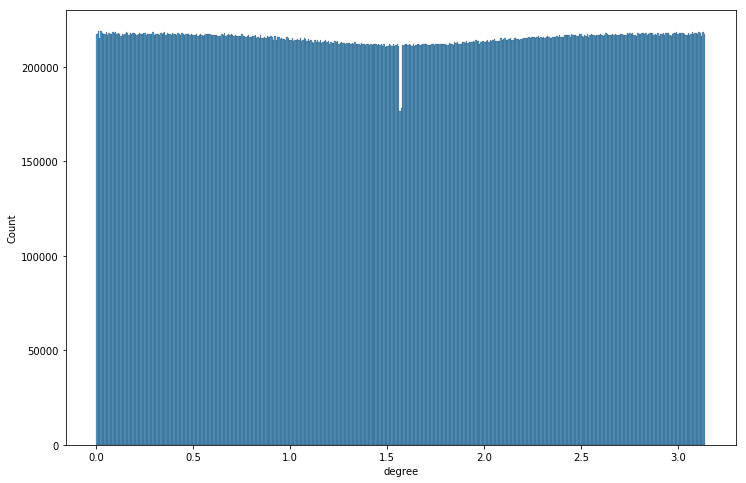

In [17]:
plt.figure(figsize = (12, 8))
sns.histplot(foil0Type0['degree'])

In [13]:
frame0Type1 = [foil011, foil012, foil013, foil014]

In [14]:
foil0Type1 = pd.concat(frame0Type1, ignore_index=True)

In [15]:
foil0Type1['angle'] = np.arccos(foil0Type1['costh'])

In [16]:
foil0Type1['angle_deg']= foil0Type1['angle']*180/(np.math.pi)

In [ ]:
foi

lets us just get the detector 1 for foil 0 type 0 and foil type 1 separately

type 0 detector 1 onlly

In [18]:
foil0Type0.head()

,Evt_id,KE,E1,E2,costh,t1,t2
0,0,364,362.044006,0.000000,0.584861,8.347490e-09,-5.000000e-09
1,1,388,0.000000,375.489014,-0.711525,-5.000000e-09,1.114040e-08
2,2,364,0.000000,358.476990,-0.837683,-5.000000e-09,1.688080e-08
3,3,364,360.477997,0.000000,0.867632,1.251320e-08,-5.000000e-09
4,4,388,385.933014,0.000000,0.959147,1.470970e-08,-5.000000e-09


In [17]:
foil0Type0Det1 = foil0Type0[foil0Type0['E2'] == 0.0]

MemoryError: Unable to allocate 2.57 GiB for an array with shape (7, 98607821) and data type float32

In [20]:
foil0Type0Det1 = foil0Type0Det1[foil0Type0Det1['KE'] < 370]

In [21]:
foil0Type0Det1.head()

,Evt_id,KE,E1,E2,costh,t1,t2
0,0,364,362.044006,0.0,0.584861,8.347490e-09,-5.000000e-09
3,3,364,360.477997,0.0,0.867632,1.251320e-08,-5.000000e-09
6,6,364,361.239014,0.0,0.993441,2.948790e-09,-5.000000e-09
12,12,364,361.799988,0.0,0.986554,1.002340e-08,-5.000000e-09
13,13,364,361.023987,0.0,0.917017,1.149230e-08,-5.000000e-09


type 1 detector 1 only 

In [23]:
foil0Type1 = foil0Type1[foil0Type1['KE'] < 370]

In [24]:
foil0Type1Det1 = foil0Type1[foil0Type1['t1'] < foil0Type1['t2']]

In [ ]:
foil0Type1Det1['degree'] = np.arccos(foil0Type1Det1['costh'])

In [27]:
det1FirstFioil0 = pd.concat([foil0Type0Det1, foil0Type1Det1], ignore_index=True)

In [28]:
det1FirstFioil0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49855758 entries, 0 to 49855757
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Evt_id  uint32 
 1   KE      uint32 
 2   E1      float32
 3   E2      float32
 4   costh   float32
 5   t1      float32
 6   t2      float32
 7   degree  float32
dtypes: float32(6), uint32(2)
memory usage: 1.5 GB


In [29]:
plt.figure(figsize=(12,8))
sns.histplot(det1FirstFioil0['degree'], bins = 100)
plt.grid()

: 

: 

In [ ]:
det1FirstFioil0.tail(10)

In [28]:
(det1FirstFioil0['costh'] < 0).sum()

6716

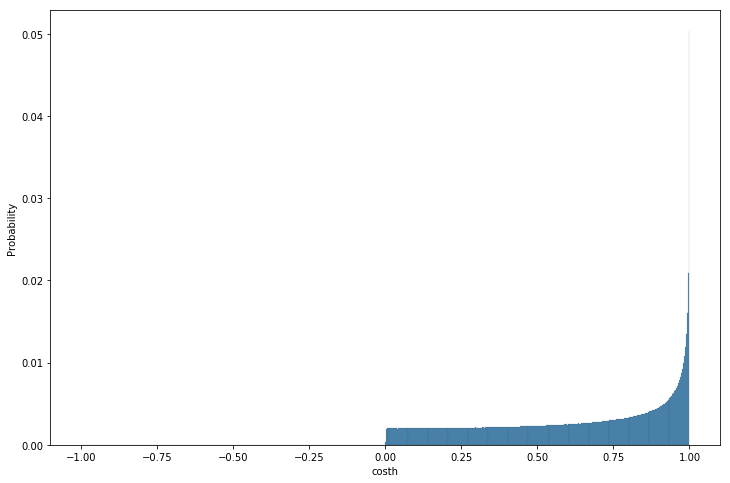

In [26]:
plt.figure(figsize = (12, 8))
sns.histplot(det1FirstFioil0['costh'], stat = 'probability', )

plotting the statistics for it 


In [ ]:
mean_stat = scipy.stats.binned_statistic(x = det1FirstFioil0['costh'], values = np.cos(df['thetaIn1']), statistic='mean', bins = 200, range = (-1, 1))


In [26]:
foil0Type1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320640 entries, 0 to 1320639
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Evt_id  1320640 non-null  uint32 
 1   KE      1320640 non-null  uint32 
 2   E1      1320640 non-null  float32
 3   E2      1320640 non-null  float32
 4   costh   1320640 non-null  float32
 5   t1      1320640 non-null  float32
 6   t2      1320640 non-null  float32
dtypes: float32(5), uint32(2)
memory usage: 35.3 MB


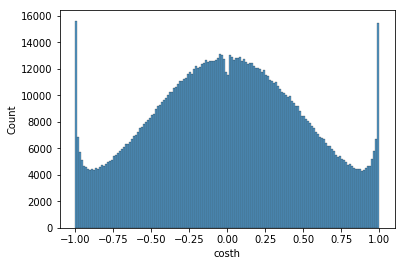

In [8]:
sns.histplot(foil0Type1['costh'])

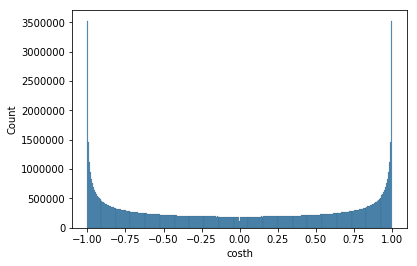

In [12]:
sns.histplot(foil0Type0['costh'])

In [29]:
foil0 = pd.concat([foil0Type0, foil0Type1], ignore_index= True)

In [30]:
foil0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99694530 entries, 0 to 99694529
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Evt_id  uint32 
 1   KE      uint32 
 2   E1      float32
 3   E2      float32
 4   costh   float32
 5   t1      float32
 6   t2      float32
dtypes: float32(5), uint32(2)
memory usage: 2.6 GB


In [12]:
foil0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99928461 entries, 0 to 99928460
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Evt_id  uint32 
 1   KE      uint32 
 2   E1      float32
 3   E2      float32
 4   costh   float32
 5   t1      float32
 6   t2      float32
dtypes: float32(5), uint32(2)
memory usage: 2.6 GB


In [31]:
plt.figure(figsize = (12, 8))
sns.histplot(det1FirstFioil0['costh'], stat = 'probability', )

: 

: 

In [18]:
type1SmallAngle = foil0Type1[foil0Type1['costh']>0.95]

In [19]:
type1SmallAngle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32082 entries, 56 to 1320588
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Evt_id  32082 non-null  uint32 
 1   KE      32082 non-null  uint32 
 2   E1      32082 non-null  float32
 3   E2      32082 non-null  float32
 4   costh   32082 non-null  float32
 5   t1      32082 non-null  float32
 6   t2      32082 non-null  float32
dtypes: float32(5), uint32(2)
memory usage: 1.1 MB


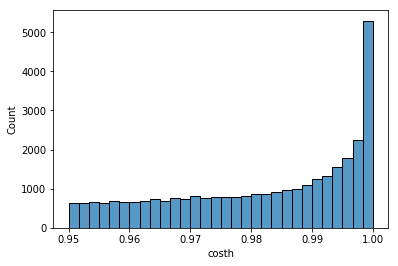

In [20]:
sns.histplot(type1SmallAngle['costh'])

In [22]:
type1SmallAngle.head(20)

,Evt_id,KE,E1,E2,costh,t1,t2
56,4377,364,254.507996,102.430000,0.997415,1.492590e-08,5.259890e-08
76,6327,364,189.626007,169.319000,0.985176,5.697160e-09,6.918510e-08
82,6381,388,313.851990,66.702400,0.991750,7.393760e-09,4.636490e-08
123,9575,364,72.690102,288.862000,0.994133,1.108930e-08,3.049510e-08
260,19168,364,281.140015,76.143097,0.982573,1.486880e-08,4.890330e-08
295,21052,364,51.576500,306.326996,0.972134,7.709220e-09,3.608970e-08
359,26418,364,196.229996,163.766006,0.994998,1.125650e-08,4.054090e-08
405,29549,364,319.015991,34.332199,0.997370,1.004340e-08,7.765200e-08
452,32891,364,228.261993,95.464302,0.995444,5.593690e-08,5.331390e-08
526,38555,364,291.319000,66.780998,0.960822,1.081870e-08,5.987290e-08


In [23]:
evtsT1Bigger = type1SmallAngle[type1SmallAngle['t1'] > type1SmallAngle['t2']]

In [25]:
evtsT1Bigger.head(10)

,Evt_id,KE,E1,E2,costh,t1,t2
452,32891,364,228.261993,95.464302,0.995444,5.593690e-08,5.331390e-08
1661,123260,364,316.104004,18.975800,0.994779,1.898030e-07,1.074410e-07
2760,204124,388,247.007996,118.508003,0.999634,9.641120e-08,3.201770e-08
4940,370404,364,161.503006,196.279999,0.998224,6.998590e-08,3.852620e-08
10597,794754,364,257.158997,80.985100,0.995082,1.277880e-07,6.144730e-08
14477,1088570,364,288.487000,42.778099,0.954618,1.360980e-07,4.445400e-08
22425,1691030,364,282.308990,76.210701,0.984612,1.319330e-07,9.535480e-08
25069,1897980,364,250.358002,93.400101,0.976288,9.464230e-08,6.422140e-08
29057,2201420,364,261.050995,94.082603,0.979571,1.067460e-07,4.517970e-08
38379,2907140,364,148.195999,197.748001,0.981001,1.615020e-07,1.090200e-07


In [12]:
type1SmallAngle = type1SmallAngle[type1SmallAngle['KE'] < 370]

In [17]:
type1SmallAngle.head()

,Evt_id,KE,E1,E2,costh,t1,t2
56,4377,364,254.507996,102.430000,0.997415,1.492590e-08,5.259890e-08
76,6327,364,189.626007,169.319000,0.985176,5.697160e-09,6.918510e-08
98,7658,364,281.382996,76.400398,0.821718,8.773880e-09,3.986430e-08
100,8012,364,281.128998,77.768700,0.848980,4.093130e-09,4.469140e-08
123,9575,364,72.690102,288.862000,0.994133,1.108930e-08,3.049510e-08


(0, 1e-08)

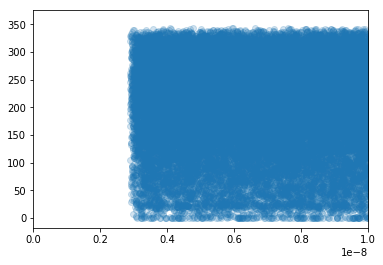

In [16]:
plt.scatter(type1SmallAngle['t1'], type1SmallAngle['E1'], alpha = 0.2)
plt.xlim(0, 10e-09)

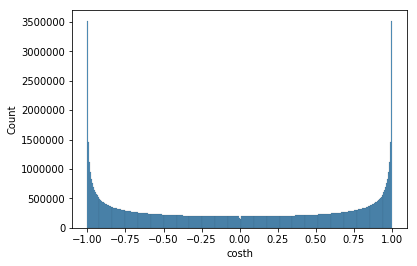

In [13]:
sns.histplot(foil0['costh'])

looking at the cos the for detector 1 type 0 + type 1

In [13]:
def det1Foil0 (df):
    df = df[df['KE'] < 370]
    df = df[df['E2'] > 0]
    return df

In [14]:
foil0Det1Only = det1Foil0(foil0)

: 

: 

In [ ]:
foil0Det1Only = foil0[]

In [29]:
foil0Det1Only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82290082 entries, 0 to 99928460
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Evt_id  uint32 
 1   KE      uint32 
 2   E1      float32
 3   E2      float32
 4   costh   float32
 5   t1      float32
 6   t2      float32
dtypes: float32(5), uint32(2)
memory usage: 2.8 GB


In [28]:
foil0Det1Only.head()

,Evt_id,KE,E1,E2,costh,t1,t2
0,0,364,362.044006,0.000000,0.584861,8.347490e-09,-5.000000e-09
2,2,364,0.000000,358.476990,-0.837683,-5.000000e-09,1.688080e-08
3,3,364,360.477997,0.000000,0.867632,1.251320e-08,-5.000000e-09
6,6,364,361.239014,0.000000,0.993441,2.948790e-09,-5.000000e-09
7,7,364,0.000000,361.838013,-0.657017,-5.000000e-09,1.516130e-08


In [1]:
foil0Det1Only = foil0Det1Only[foil0Det1Only['E2'] > 0 ]

NameError: name 'foil0Det1Only' is not defined

In [ ]:
foil0Det1Only.info

In [3]:
import numpy as np


In [10]:
np.random.rand(5,1)*() - 5

array([[-1.95650209],
       [ 0.77223221],
       [-3.30262167],
       [ 2.39684343],
       [-4.40303837]])